In [1]:
import fitsio
import numpy as np
import matplotlib.pyplot as plt
import pickle
import os

from kl_tools import cube, intensity, basis, parameters
from kl_tools.parameters import Pars

%matplotlib inline

In [17]:
outdir = '../tests/test_likelihood_by_param/es-n6-obs-btrue/'

true_file = os.path.join(outdir, 'true_pars.pkl')
with open(true_file, 'rb') as f:
    true_pars = pickle.load(f)
                         
true_pars = {
        'g1': 0.025,
        'g2': -0.0125,
        # 'g1': 0.0,
        # 'g2': 0.0,
        'theta_int': np.pi / 6,
        # 'theta_int': 0.,
        'sini': 0.7,
        'v0': 5,
        'vcirc': 200,
        'rscale': 5,
        # 'beta': np.NaN,
        # 'flux': true_flux,
        # 'hlr': true_hlr,
    }

pars_file = os.path.join(outdir, 'pars.pkl')
with open(pars_file, 'rb') as f:
    pars = pickle.load(f)
    
datacube_file = os.path.join(outdir, 'datacube.pkl')
with open(datacube_file, 'rb') as f:
    cube = pickle.load(f)
# cube = cube.DataCube.from_fits(datacube_file, pars=pars)

In [18]:
ls ../tests/test_likelihood_by_param/es-n6-obs-btrue/

datacube-slices.png      loglike-slices.png       true_imap.npy
datacube.fits            pars.pkl                 true_pars.pkl
datacube.pkl             true-imap-residuals.png  vmap.png
g1/                      true-vmap-residuals.png


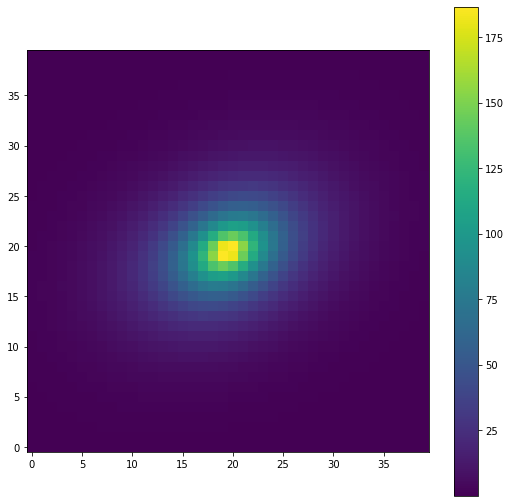

In [25]:
true_imap = np.load(os.path.join(outdir, 'true_imap.npy'))

plt.imshow(imap, origin='lower')
plt.colorbar()
plt.gcf().set_size_inches(9,9)

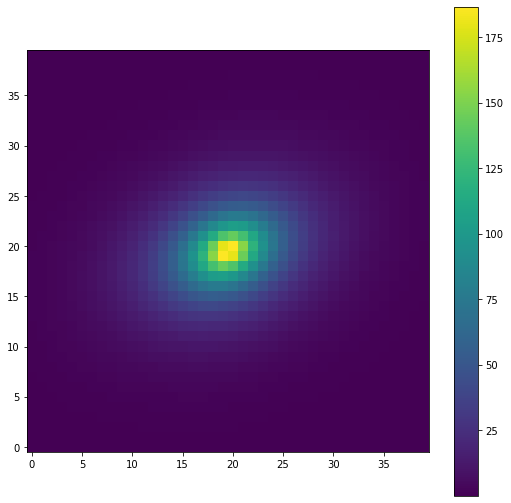

In [27]:
shape = imap.shape
nx = shape[1]
ny = shape[0]

basis_kwargs = {
    'Nmax': 6,
    # 'plane': 'disk',
    'plane': 'obs',
    'beta': 0.15, # n6-exp_shapelet
#     'nx': cube.Nx,
#     'ny': cube.Ny,
#     'pix_scale': cube.pix_scale
    }

intensity_kwargs = {
    'basis_type': 'exp_shapelets',
    'basis_kwargs': basis_kwargs
}

# es_basis = basis.build_basis('exp_shapelets', basis_kwargs)

fitted_imap = intensity.build_intensity_map('basis', cube, intensity_kwargs)
model = fitted_imap.render(true_pars, cube, pars.meta)

plt.imshow(model, origin='lower')
plt.colorbar()
plt.gcf().set_size_inches(9,9)

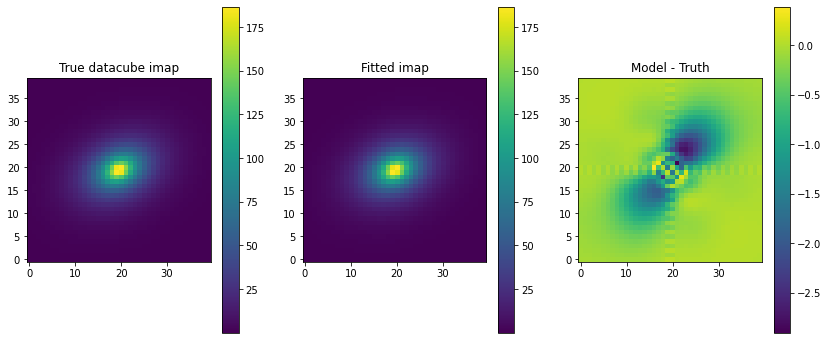

In [29]:
plt.subplot(131)
plt.imshow(true_imap, origin='lower')
plt.colorbar()
plt.title('True datacube imap')

plt.subplot(132)
plt.imshow(model, origin='lower')
plt.colorbar()
plt.title('Fitted imap')

plt.subplot(133)
plt.imshow(model - true_imap, origin='lower')
plt.colorbar()
plt.title('Model - Truth')

plt.gcf().set_size_inches(14,6)

### Do it from scratch

In [ ]:
fitted_imap.render(true_pars, cube, pars.meta)